# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import pylab 
from scipy import stats
from sklearn import datasets
import matplotlib.pyplot as plt

In [2]:
iris=datasets.load_iris()
df=pd.DataFrame(iris.data,columns=iris.feature_names)
df['target']=iris.target

**In the Application of Gaussian Distribution we have seen that petal length and petal width follows Gaussian Distribution by Approxiation**
#**To OverCome This or make that approximated Gaussian Distribution to a Gaussian Distribution we Use Central Limit Theorem**

# Exploring Petal Length and Petal Width By Q-Q plot and PDF of Gaussian dist

In [3]:
def PDF_Gaussian(x):
    mean_std=((x-x.mean())**2)/(2*(x.std()*x.std()))677
    Exponential_Value=np.exp(-mean_std)
    first=(1/(np.sqrt(2)*(22/7)*x.std()))
    pdf=first*Exponential_Value
    return pdf

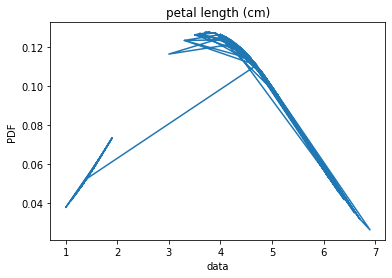

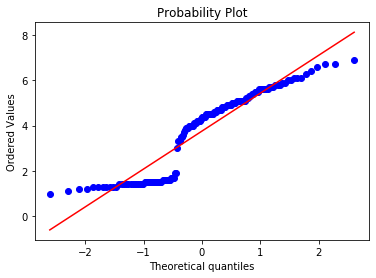

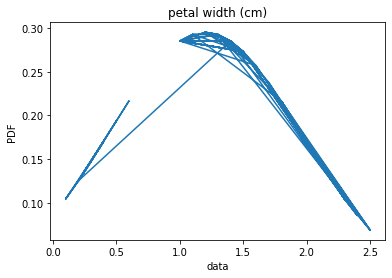

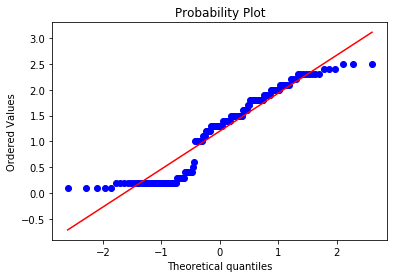

In [4]:
for i in ['petal length (cm)','petal width (cm)']:
    data=df[i]
    pdf=PDF_Gaussian(data)
    plt.plot(data,pdf)
    plt.xlabel('data')
    plt.ylabel('PDF')
    plt.title(i)
    plt.show()
    stats.probplot(df[i].values,dist='norm',plot=pylab)
    pylab.show()

# Observations
#**By Q-Q plot and PDF of Gaussian Distribution Data Seems to be Approximatly Gaussian Distribution**
#**Lets Apply Central Limit Theorem to make it full Gaussian Distribution**

In [20]:
std=df['petal length (cm)'].std()
mean=df['petal length (cm)'].mean()

# Central Limit Theorem

In [55]:
sampled_petal_length=df['petal length (cm)'].values.reshape(30,5)
sampled_petal_length
#mean_of_sample=sampled_petal_length.mean(axis=1)
empty=np.empty(sampled_petal_length.shape)
for i,j in enumerate(sampled_petal_length):
    k=int(j.shape[0]/2)
    empty[i,:k]=j[:k]
    empty[i,k:]=sampled_petal_length[i+1,k:]
    if i==28:
        break
mean_of_sample=empty.mean(axis=1)

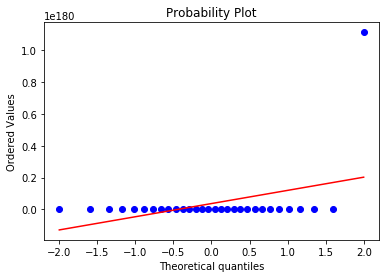

In [56]:
stats.probplot(mean_of_sample,dist='norm',plot=pylab)
pylab.show()

In [57]:
def PDF_Sampled_Gaussian(x,std,mean):
    first=1/np.sqrt(2*(22/7)*(std**2/5))
    second=np.exp(-((x-mean)**2/2*(std**2/5)))
    pdf=first*second
    return pdf

C:\Users\Mani\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in square
  This is separate from the ipykernel package so we can avoid doing imports until


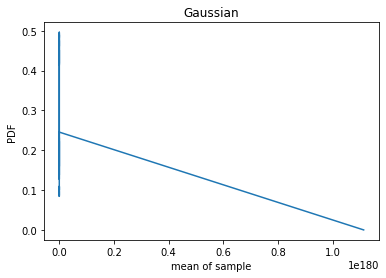

In [58]:
pdf=PDF_Sampled_Gaussian(mean_of_sample,std,mean)
plt.plot(mean_of_sample,pdf)
plt.xlabel('mean of sample')
plt.ylabel('PDF')
plt.title('Gaussian')
plt.show()